<a href="https://colab.research.google.com/github/RealB1ackY/NN_practice/blob/main/MLP_California_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch import nn
import matplotlib.pyplot as plt
import sklearn.datasets
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 20]
%matplotlib inline

# Загрузка датасета и EDA

---



In [2]:
X, y = sklearn.datasets.fetch_california_housing(return_X_y=True, as_frame=True)
df = pd.concat([X, y], axis=1)
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [3]:
df.tail()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894

In [4]:
df.drop_duplicates()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

>В датасете отсутствуют дубликаты

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

>В датасете отсутствуют пропущенные значения

In [7]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

>Общее описание датасета свидетельствует о вероятном наличии выбросов 

##Одномерный анализ

---



In [8]:
from typing import Callable


def plot_figures(kind: Callable, 
                 data: pd.DataFrame, 
                 x=None, y=None, 
                 figsize: tuple=None, nrows=1, 
                 ncols=1) -> None:
  fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
  i, j = 0, 0

  if x is None:
    for col in data.columns:
      kind(y=data[col], data=data[col], ax=axs[i][j])
      if j < ncols - 1:
        j += 1
      else:
        i += 1
        j = 0

  else:
    for col in data.columns:
      kind(x=data[col], data=data[col], ax=axs[i][j])
      if j < ncols - 1:
        j += 1
      else:
        i += 1
        j = 0

  plt.show()

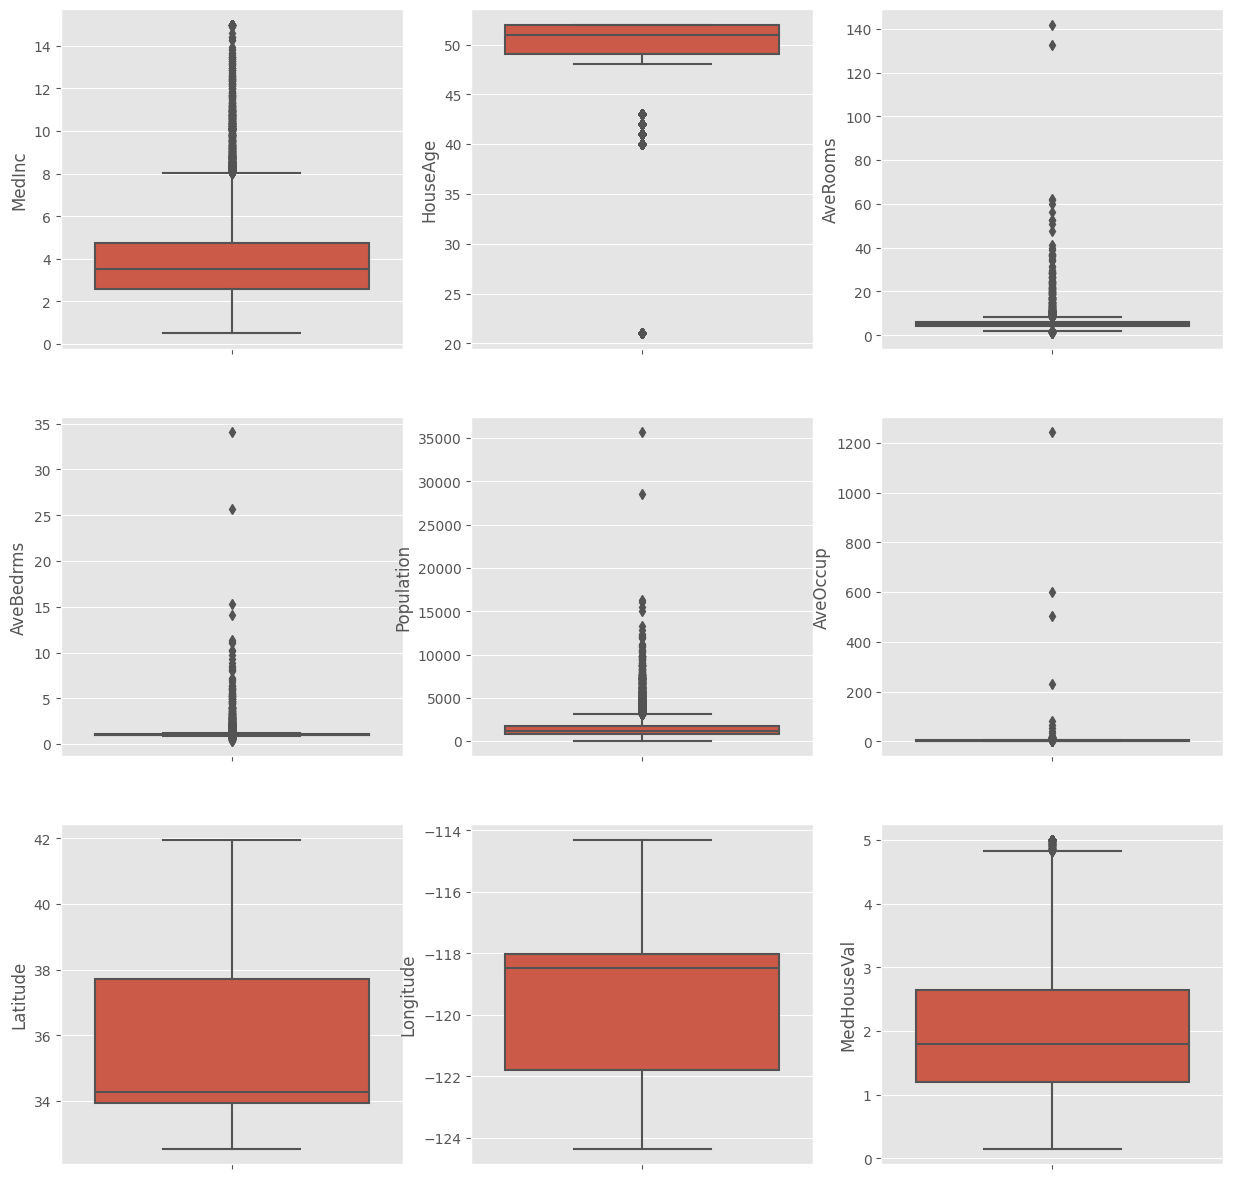

In [9]:
plot_figures(kind=sns.boxplot, data=df, y=1, nrows=3, ncols=3, figsize=(15, 15))

>Можем наблюдать ярковыраженные аутлаеры в Population, HouseAge, AveRooms, AveBedrms и AveOccup

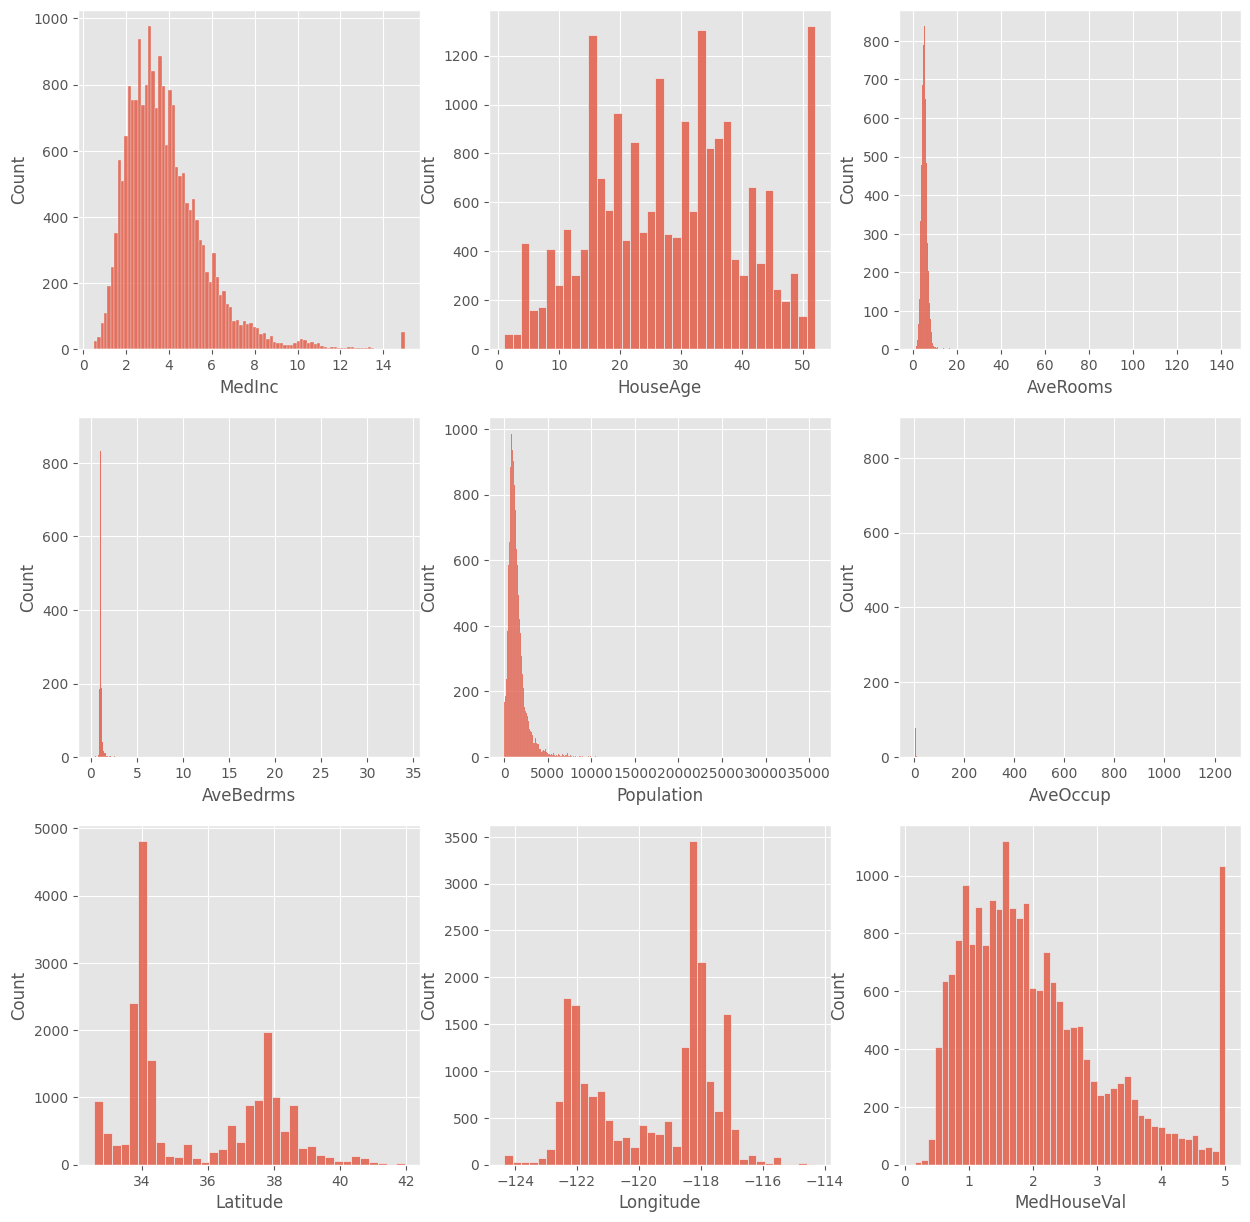

In [10]:
plot_figures(kind=sns.histplot, data=df, x=1, nrows=3, ncols=3, figsize=(15, 15))

>На графиках присутствует явная правосторонная ассимитрия, распределение скошено в левую часть графика

Приведем ГС к нормальному распределению, для этого воспользуемся StandardScaler(), заNULLим значения, превышающие +- 2 стандартных отклонения, а после избавимся от них

In [11]:
from sklearn.preprocessing import StandardScaler


def remove_outliers(df: pd.DataFrame) -> None:
  for col in df.columns:
    df.loc[(df[col] > 2) | (df[col] < -2)] = np.NaN


labels = df.columns
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(data=df, columns=labels)

remove_outliers(df)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
1  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
2 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   
3  0.087447  1.856182 -0.269730   0.014669   -0.894071 -0.089618  1.038503   
4 -0.111366  1.856182 -0.200918  -0.306633   -0.292712 -0.090725  1.033821   

   Longitude  MedHouseVal  
0  -1.332827     1.258693  
1  -1.337818     1.165100  
2  -1.337818     1.172900  
3  -1.337818     0.544611  
4  -1.337818     0.800259

In [12]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  17431.000000  17431.000000  17431.000000  17431.000000  17431.000000   
mean      -0.154923      0.048703     -0.116263     -0.073698     -0.106231   
std        0.737424      0.970615      0.451001      0.238887      0.626905   
min       -1.774299     -1.957806     -1.852319     -1.522845     -1.256123   
25%       -0.709174     -0.765935     -0.425568     -0.195984     -0.554095   
50%       -0.242119      0.108104     -0.125531     -0.105853     -0.228249   
75%        0.319211      0.664310      0.174142     -0.002274      0.225641   
max        1.997725      1.856182      1.999294      1.990559      1.999694   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  17431.000000  17431.000000  17431.000000  17431.000000  
mean      -0.010632     -0.032444      0.017518     -0.169762  
std        0.081483      0.950832      0.965906      0.762070  
min       -0.223445     -1.447568     -1.981696     -1.662641  
25%       -0.059765     -0.796789     -1.023365     -0.769162  
50%       -0.021471     -0.642287      0.548896     -0.291663  
75%        0.024083      0.963593      0.778496      0.301961  
max        1.758428      1.998285      1.996375      1.998774

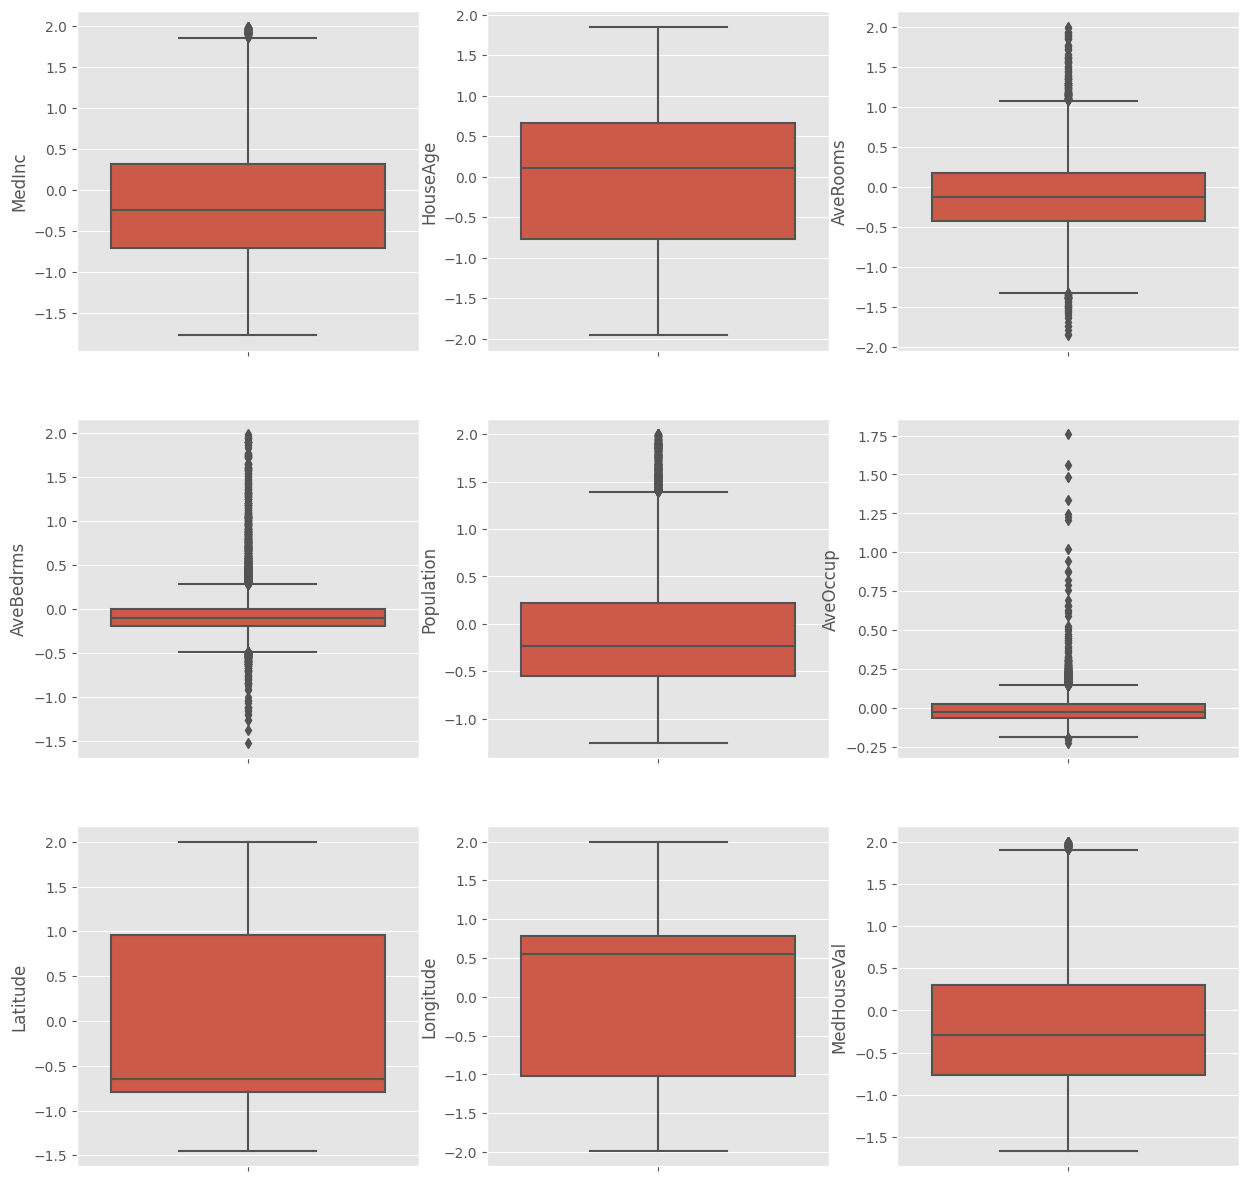

In [13]:
plot_figures(kind=sns.boxplot, data=df, y=1, nrows=3, ncols=3, figsize=(15, 15))

>Значения, сильно превышающие полтора межквартильных размаха все еще присутствуют, впрочем, теперь это выражено не так сильно

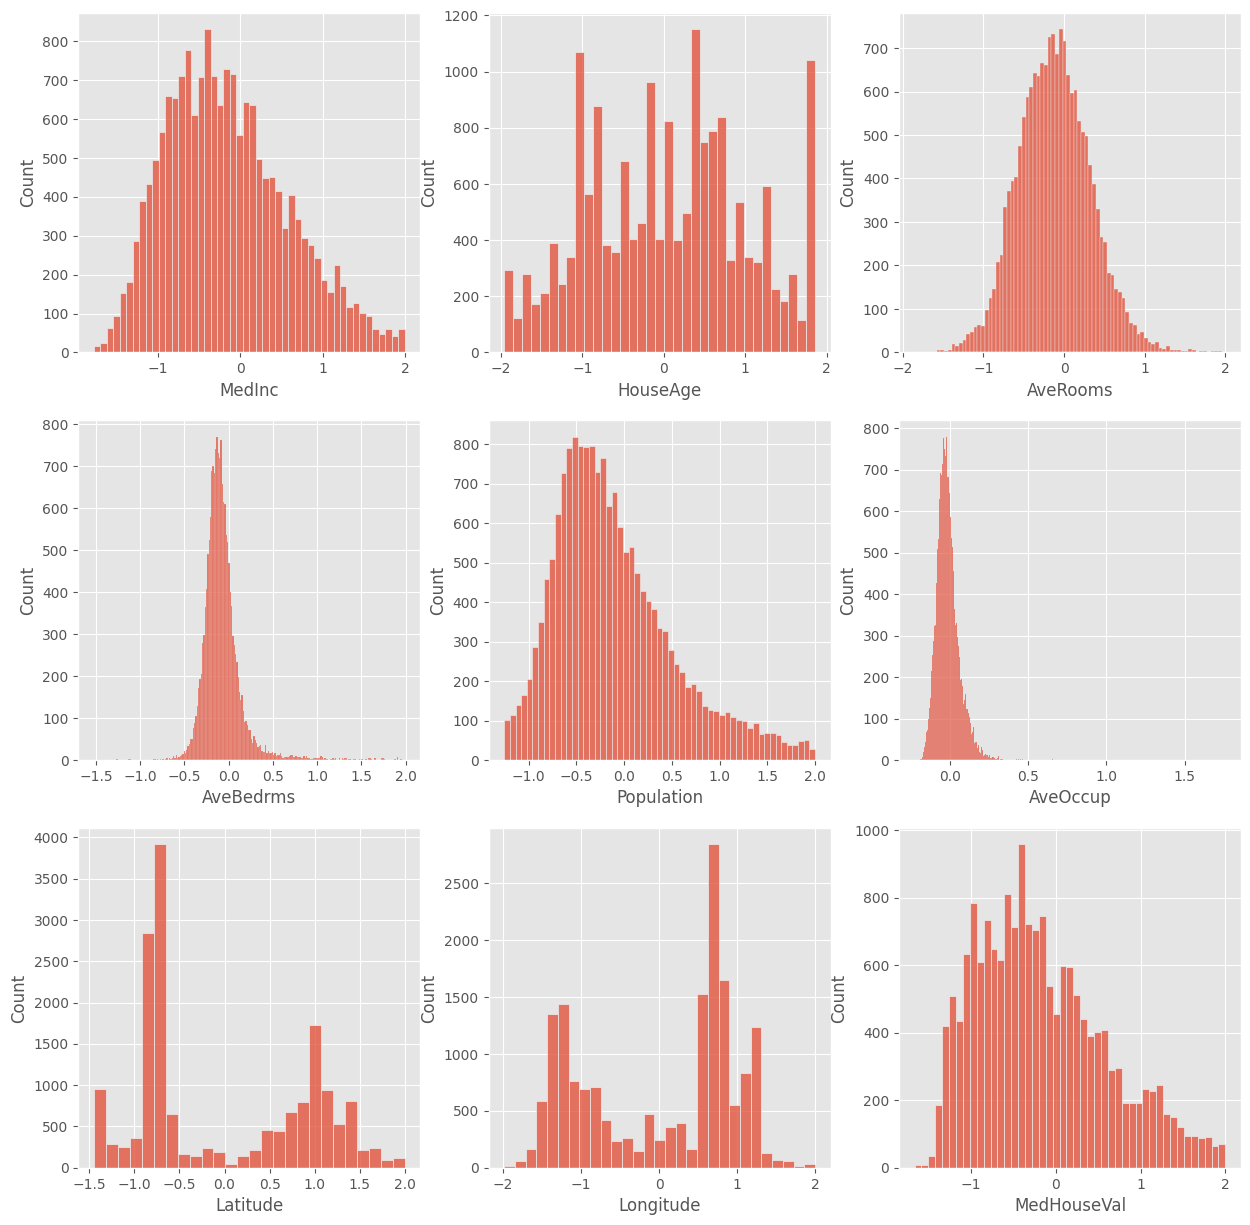

In [14]:
plot_figures(kind=sns.histplot, data=df, x=1, nrows=3, ncols=3, figsize=(15, 15))

>Наиболее перекошенные выборки приняли более-менее нормальное распределение

##Двумерный анализ

---



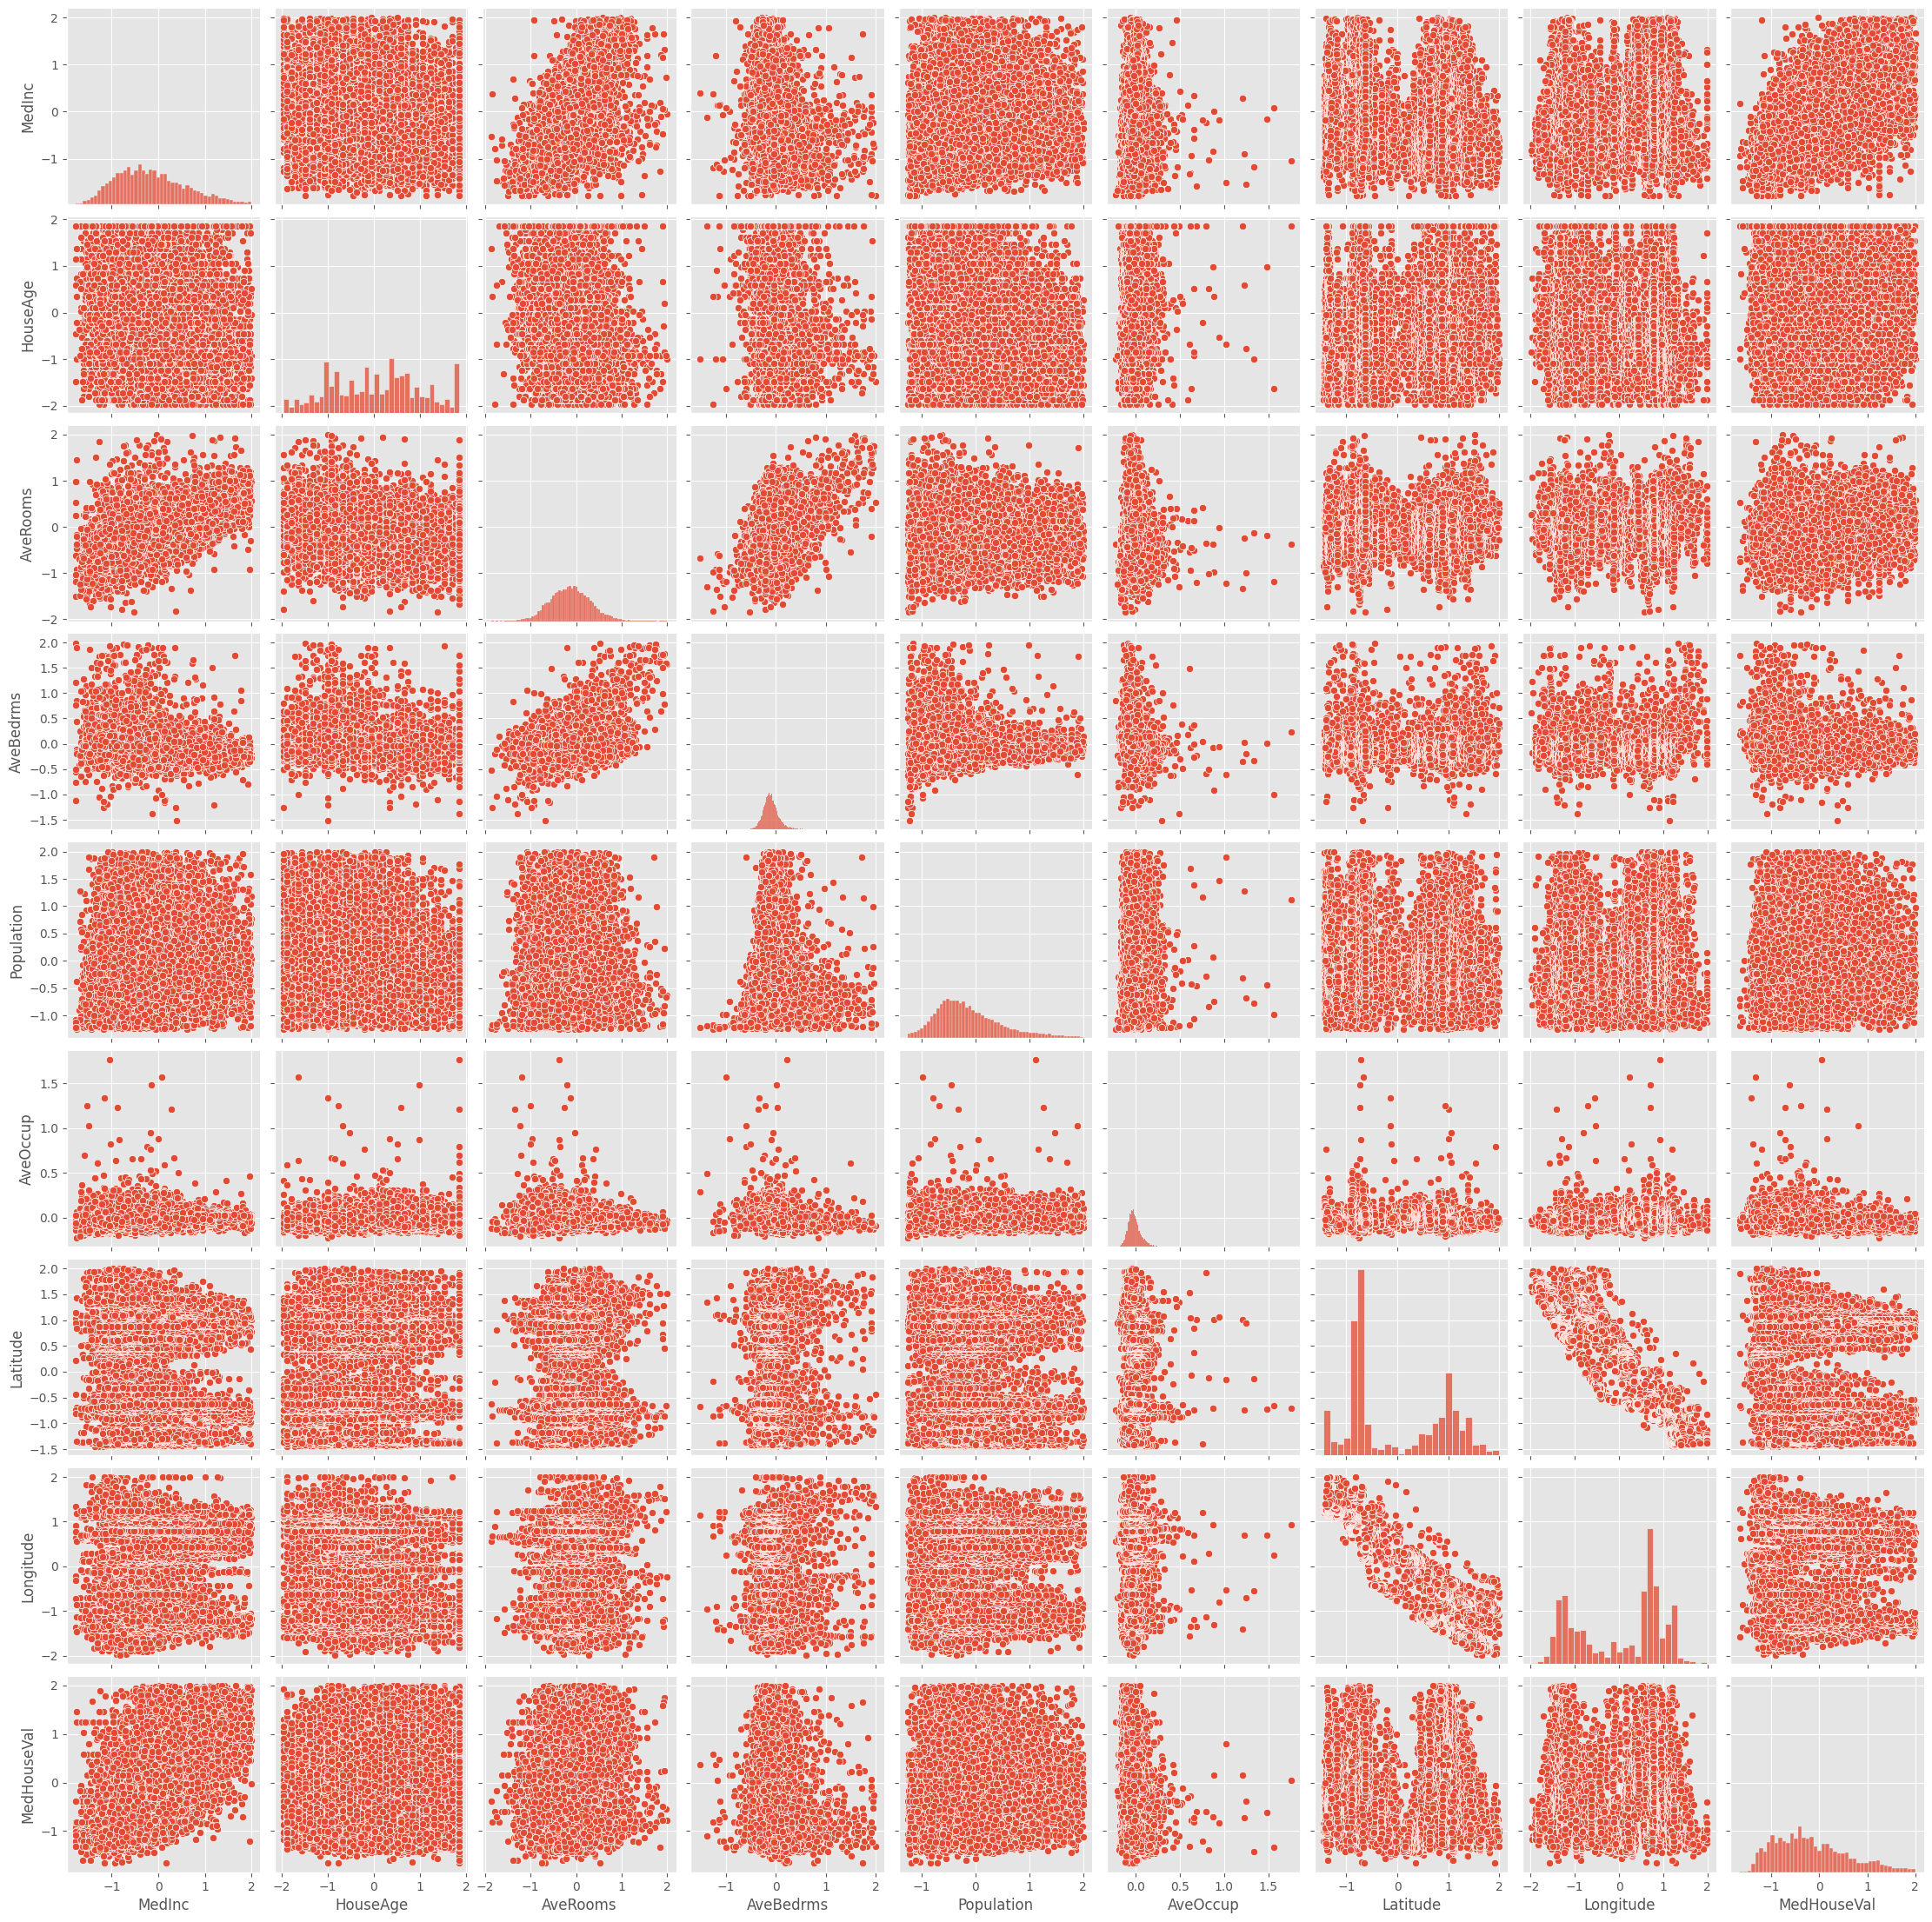

In [15]:
sns.pairplot(data=df, kind='scatter')
plt.show()

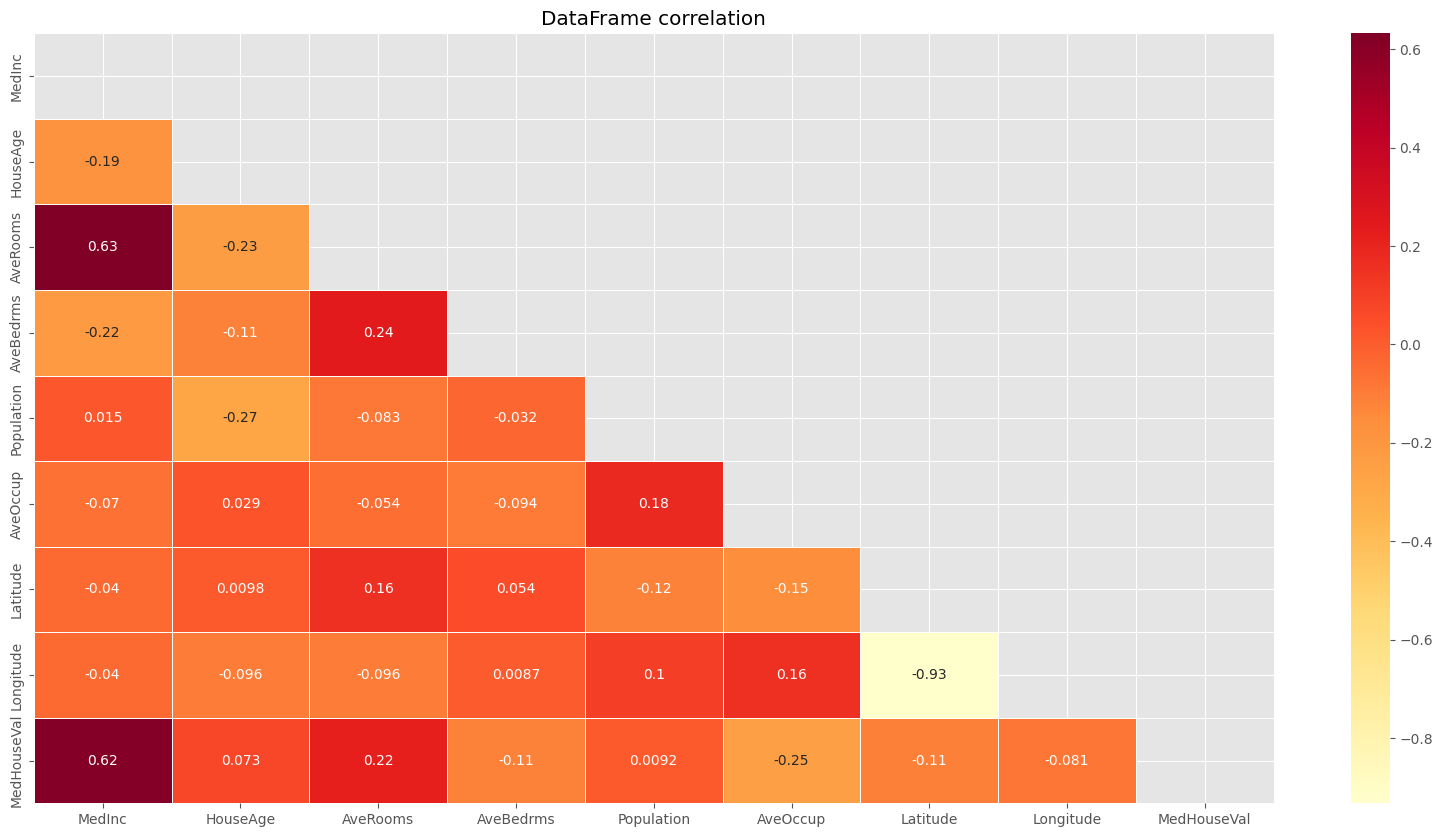

In [16]:
def plot_correlation_heatmap(data: pd.DataFrame, title_name='DataFrame correlation') -> None:
    corr = data.corr()
    fig, axes = plt.subplots(figsize=(20, 10))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap='YlOrRd', annot=True)
    plt.title(title_name)
    plt.show()


plot_correlation_heatmap(data=df)

>Можем наблюдать очень сильную отрицательную корреляцию между Longitude и Latitude, также довольно сильно положительно коррелируют между собой пары MedInс/MedHouseVal и MedInc/AveRooms

Удалим из датасета признак Latitude

In [17]:
df.drop('Latitude', axis=1, inplace=True)
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Longitude  \
0  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  -1.332827   
1  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  -1.337818   
2 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  -1.337818   
3  0.087447  1.856182 -0.269730   0.014669   -0.894071 -0.089618  -1.337818   
4 -0.111366  1.856182 -0.200918  -0.306633   -0.292712 -0.090725  -1.337818   

   MedHouseVal  
0     1.258693  
1     1.165100  
2     1.172900  
3     0.544611  
4     0.800259

## Преобразование датасета в тензоры и разбиение на выборки

---



In [18]:
class CaliforniaDataset(Dataset):


  def __init__(self, X: pd.DataFrame, y: pd.Series, scale_data: bool=False):
    if not torch.is_tensor(X) or not torch.is_tensor(y):
      if scale_data:
        X = StandardScaler().fit_transform
        y = StandardScaler().transform
      self.X = torch.from_numpy(X.to_numpy()).type(torch.FloatTensor)
      self.y = torch.from_numpy(y.to_numpy()).type(torch.FloatTensor)
    else:
      self.X = X
      self.y = y
  

  def __len__(self):
    return len(self.X)


  def __getitem__(self, i):
    return self.X[i], self.y[i]

In [19]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Longitude
0  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  -1.332827
1  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  -1.337818
2 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  -1.337818
3  0.087447  1.856182 -0.269730   0.014669   -0.894071 -0.089618  -1.337818
4 -0.111366  1.856182 -0.200918  -0.306633   -0.292712 -0.090725  -1.337818

In [20]:
y.head()

0    1.258693
1    1.165100
2    1.172900
3    0.544611
4    0.800259
Name: MedHouseVal, dtype: float64

Разделим выборки на X_train, X_test, y_train, y_test

In [21]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=42)

# Обучение и тестирование нейросети

---



В качестве нейросети будем использовать самую обыкновенную MLP

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [23]:
class MLP(nn.Module):


  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(7, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 1)
    )


  def forward(self, x):
    return self.layers(x)

In [24]:
class Trainer():


  def __init__(self, dataset, net, batch_size,
               learning_rate, optim, loss_function, epochs,
               device='cpu'):
    self.dataset = dataset
    self.net = net
    self.batch_size = batch_size
    self.learning_rate = learning_rate
    self.optim = optim
    self.loss_function = loss_function
    self.epochs = epochs
    self.device = device
    self.start_model = net
    self.best_model = net

    self.train_loss = []
    self.val_loss = []


  def fit(self, X_train, X_test, y_train, y_test):
    Net = self.start_model
    device = torch.device(self.device)
    Net.to(self.device)
    optimizer = self.optim(Net.parameters(), lr=self.learning_rate)
    train = self.dataset(X_train, y_train)
    val = self.dataset(X_val, y_val)
    train = DataLoader(train, batch_size=self.batch_size, shuffle=False, drop_last=True)
    val = DataLoader(val, batch_size=self.batch_size, shuffle=False, drop_last=False)
    best_val_loss = float('inf')
    best_ep = 0

    for epoch in range(self.epochs):
      if epoch % 10 == 0:
        print(f'Эпоха: {epoch}', end=' ')
      Net.train()
      mean_loss = 0
      batch_n = 0

      for batch_X, target in train:
        optimizer.zero_grad()
        target = target.view(len(target), 1)
        batch_X = batch_X.to(self.device)
        target = target.to(self.device)
        y_pred = Net(batch_X)
        loss = self.loss_function(y_pred, target)
        loss.backward()
        optimizer.step()
        mean_loss += loss.item()
        batch_n += 1

      mean_loss /= batch_n
      self.train_loss.append(mean_loss)
      if epoch % 10 == 0:
        print(f'Ошибка train: {mean_loss}')

      mean_loss = 0
      batch_n = 0

      with torch.inference_mode():
        for batch_X, target in val:
          target = target.view(len(target), 1)
          batch_X = batch_X.to(self.device)
          target = target.to(self.device)
          Net.eval()
          y_pred = Net(batch_X)
          loss = self.loss_function(y_pred, target)
          mean_loss += loss.item()
          batch_n += 1

      mean_loss /= batch_n
      self.val_loss.append(mean_loss)
      if epoch % 10 == 0:
        print(f'Ошибка val: {mean_loss}')

      if mean_loss < best_val_loss:
        self.best_model = Net
        best_val_loss = mean_loss
        best_ep = epoch


  def predict(self, X):
    return self.best_model(X)

In [25]:
def plot_loss(Loss_train, Loss_val):
    plt.figure(figsize=(12, 5))
    plt.plot(range(len(Loss_train)), Loss_train, color='orange', label='train', linestyle='--')
    plt.plot(range(len(Loss_val)), Loss_val, color='blue', marker='o', label='val')
    plt.legend()
    plt.show()

In [26]:
test_set = CaliforniaDataset(X_test, y_test)
test_loader = DataLoader(test_set, batch_size=10, shuffle=False, drop_last=True)

In [27]:
X_test, y_test = [], []
for features, target in test_loader:
  X_test.append(features)
  y_test.append(target)
X_test = torch.stack(X_test)
y_test = torch.stack(y_test).view(-1)

## SGD L1Loss

---



In [220]:
net = MLP()


params = {
    'dataset': CaliforniaDataset,
    'net': net,
    'batch_size': 10,
    'learning_rate': 0.001,
    'optim': torch.optim.SGD,
    'loss_function': nn.L1Loss(),
    'epochs': 30,
    'device': device
}

model = Trainer(**params)
model.fit(X_train, X_val, y_train, y_val)

Эпоха: 0 Ошибка train: 0.6229962557839435
Ошибка val: 0.5855497971475978
Эпоха: 10 Ошибка train: 0.41895668716236734
Ошибка val: 0.40649353057402254
Эпоха: 20 Ошибка train: 0.3891672714261347
Ошибка val: 0.38086077293386433


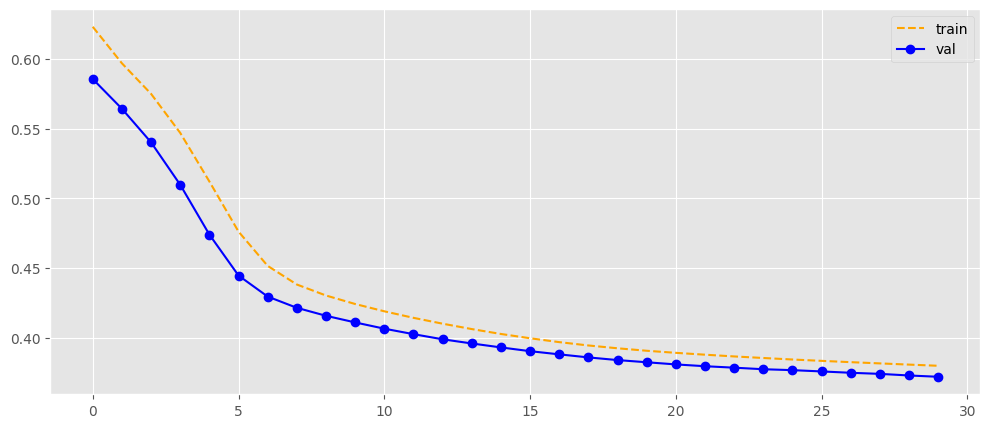

In [221]:
plot_loss(model.train_loss, model.val_loss)

In [222]:
y_pred = model.predict(X_test).view(-1)

In [223]:
MAE = nn.L1Loss()
output_tensor = MAE(y_pred, y_test)
print(f'MAE loss: {output_tensor}')

MAE loss: 0.377368301153183


## Adam L1Loss

---



In [224]:
net = MLP()


params = {
    'dataset': CaliforniaDataset,
    'net': net,
    'batch_size': 10,
    'learning_rate': 0.001,
    'optim': torch.optim.Adam,
    'loss_function': nn.L1Loss(),
    'epochs': 30,
    'device': device
}

model = Trainer(**params)
model.fit(X_train, X_val, y_train, y_val)

Эпоха: 0 Ошибка train: 0.4093771602976265
Ошибка val: 0.37210713642886856
Эпоха: 10 Ошибка train: 0.3226284544148514
Ошибка val: 0.3314276304320141
Эпоха: 20 Ошибка train: 0.312742289644109
Ошибка val: 0.323642325926476


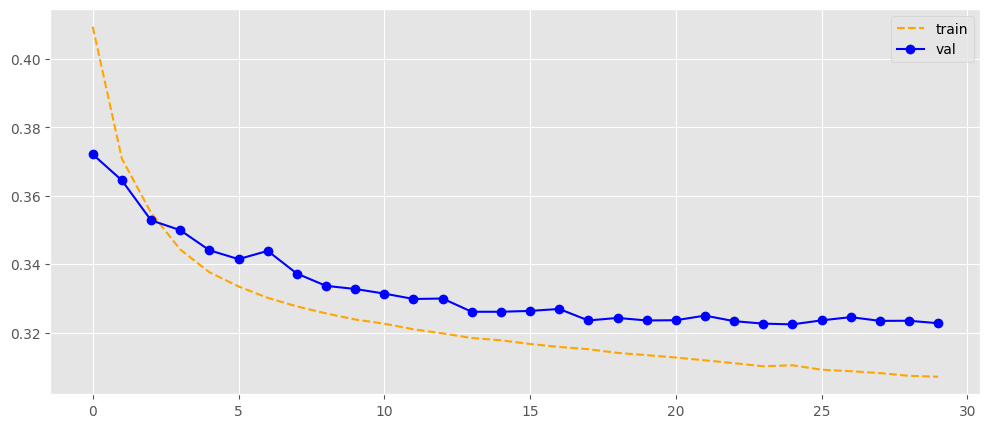

In [225]:
plot_loss(model.train_loss, model.val_loss)

In [226]:
y_pred = model.predict(X_test).view(-1)

In [227]:
MAE = nn.L1Loss()
output_tensor = MAE(y_pred, y_test)
print(f'MAE loss: {output_tensor}')

MAE loss: 0.3191888928413391


## RMSprop L1Loss

---



In [228]:
net = MLP()


params = {
    'dataset': CaliforniaDataset,
    'net': net,
    'batch_size': 10,
    'learning_rate': 0.001,
    'optim': torch.optim.RMSprop,
    'loss_function': nn.L1Loss(),
    'epochs': 30,
    'device': device
}

model = Trainer(**params)
model.fit(X_train, X_val, y_train, y_val)

Эпоха: 0 Ошибка train: 0.39596226087740166
Ошибка val: 0.36870342693731917
Эпоха: 10 Ошибка train: 0.32162885465547797
Ошибка val: 0.33338170178384013
Эпоха: 20 Ошибка train: 0.31336984911746385
Ошибка val: 0.3262541787458696


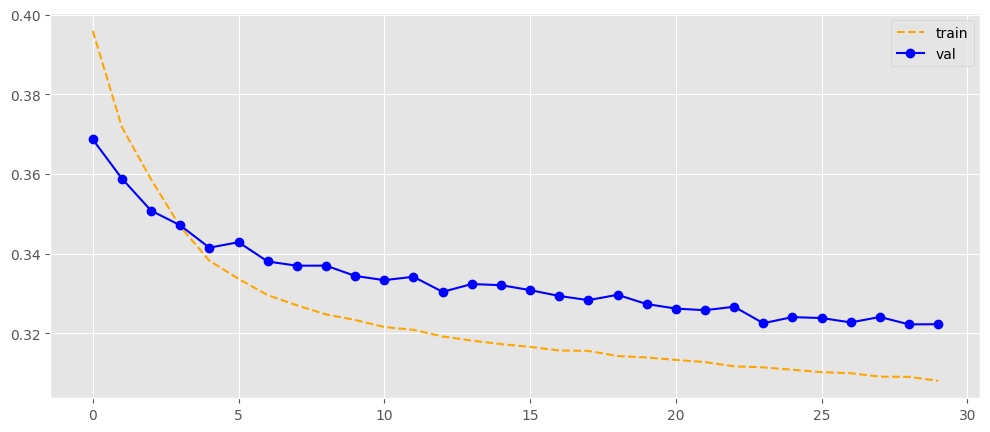

In [229]:
plot_loss(model.train_loss, model.val_loss)

In [230]:
y_pred = model.predict(X_test).view(-1)

In [231]:
MAE = nn.L1Loss()
output_tensor = MAE(y_pred, y_test)
print(f'MAE loss: {output_tensor}')

MAE loss: 0.32282212376594543


## SGD MSELoss

---



In [232]:
net = MLP()


params = {
    'dataset': CaliforniaDataset,
    'net': net,
    'batch_size': 10,
    'learning_rate': 0.001,
    'optim': torch.optim.SGD,
    'loss_function': nn.MSELoss(),
    'epochs': 30,
    'device': device
}

model = Trainer(**params)
model.fit(X_train, X_val, y_train, y_val)

Эпоха: 0 Ошибка train: 0.5544243203752349
Ошибка val: 0.47171923968631424
Эпоха: 10 Ошибка train: 0.2936961298567827
Ошибка val: 0.28261446754279995
Эпоха: 20 Ошибка train: 0.2680639493818346
Ошибка val: 0.26105963662907183


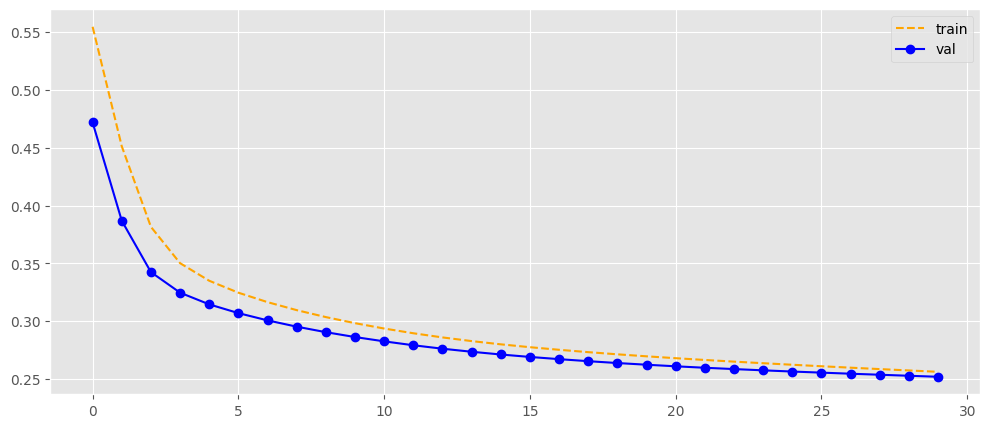

In [233]:
plot_loss(model.train_loss, model.val_loss)

In [234]:
y_pred = model.predict(X_test).view(-1)

In [235]:
MSE = nn.MSELoss()
output_tensor = MSE(y_pred, y_test)
print(f'MSE loss: {output_tensor}')

MSE loss: 0.25315162539482117


## Adam MSELoss

---



In [236]:
net = MLP()


params = {
    'dataset': CaliforniaDataset,
    'net': net,
    'batch_size': 10,
    'learning_rate': 0.001,
    'optim': torch.optim.Adam,
    'loss_function': nn.MSELoss(),
    'epochs': 30,
    'device': device
}

model = Trainer(**params)
model.fit(X_train, X_val, y_train, y_val)

Эпоха: 0 Ошибка train: 0.29358637788863273
Ошибка val: 0.2622726894061169
Эпоха: 10 Ошибка train: 0.19975531240613267
Ошибка val: 0.21207394397532017
Эпоха: 20 Ошибка train: 0.189701454302198
Ошибка val: 0.20544683628510096


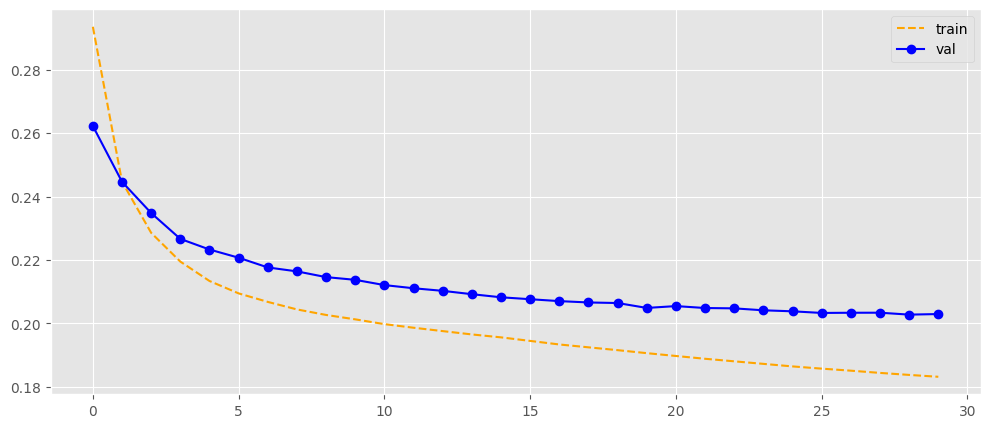

In [237]:
plot_loss(model.train_loss, model.val_loss)

In [238]:
y_pred = model.predict(X_test).view(-1)

In [239]:
MSE = nn.MSELoss()
output_tensor = MSE(y_pred, y_test)
print(f'MSE loss: {output_tensor}')

MSE loss: 0.1963302493095398


## RMSprop MSELoss

---



In [240]:
net = MLP()


params = {
    'dataset': CaliforniaDataset,
    'net': net,
    'batch_size': 10,
    'learning_rate': 0.001,
    'optim': torch.optim.RMSprop,
    'loss_function': nn.MSELoss(),
    'epochs': 30,
    'device': device
}

model = Trainer(**params)
model.fit(X_train, X_val, y_train, y_val)

Эпоха: 0 Ошибка train: 0.2735736954458165
Ошибка val: 0.2564189972564108
Эпоха: 10 Ошибка train: 0.19851904293638098
Ошибка val: 0.21903377254747047
Эпоха: 20 Ошибка train: 0.19023837972628443
Ошибка val: 0.21321481695788297


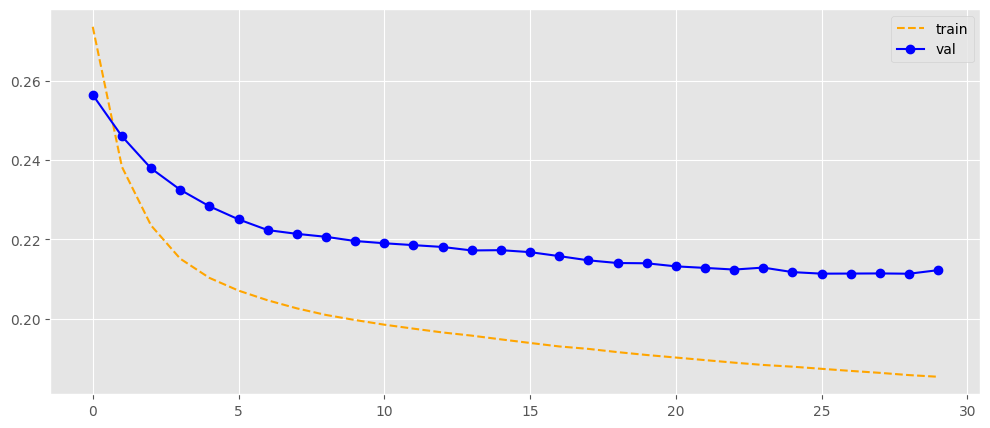

In [241]:
plot_loss(model.train_loss, model.val_loss)

In [242]:
y_pred = model.predict(X_test).view(-1)

In [243]:
MSE = nn.MSELoss()
output_tensor = MSE(y_pred, y_test)
print(f'MSE loss: {output_tensor}')

MSE loss: 0.20986966788768768


>В ходе эксперемента (был проведен множество раз на разных значениях learning rate) можно сделать следующие выводы:
1. На больших значениях learning rate SGD уверенее находит экстремум в сравнении с Adam и RMSprop
2. На больших значениях lr RMSprop имеет странную особенность на тестовой выборке, в ряде случаев стартовая ошибка оптимизатора улетала в поднебесье (750 тысяч и выше), Adam имеет ту же особеннность, но даже близко не так экстремально, в общем случае это негативно сказывается на интерпретации оценок
3. На низких значениях lr SGD относительно плохо добирается до глобального минимума, Adam и RMSprop напротив ощущают себя гораздо увереннее
4. Adam в среднем показывает результаты лучше, чем RMSprop, впрочем разница не столь существенная
5. При приближении Adam и RMSprop к глобальному минимуму ошибка на валидационной выборке стабильно выше, чем на тренировачной, тестовая же находится между ними, у SGD же ошибка убывает в порядке train -> val -> test
6. MAE в целом не особо подходит для нелинейных моделей и уступает MSE в качестве метрики оценки модели

В целом, комбинация Adam MSE показала себя с наилучшей стороны на данной MLP моделе